In [1]:
import numpy as np
import matplotlib.pyplot as plt


from qiskit import QuantumCircuit, generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, EstimatorV2 as Estimator

from qiskit_aer import AerSimulator

from qet import MinimalQETCircuit, LongRangeQETCircuit, LongRangeQETCircuitStatic

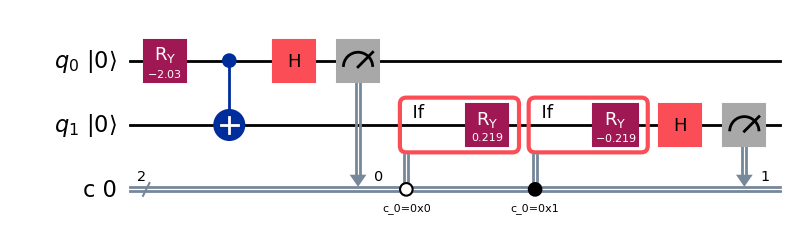

In [2]:
qet = MinimalQETCircuit(3, 6, v_measure=True)
qet.build_circuit()
qet.draw_circuit()

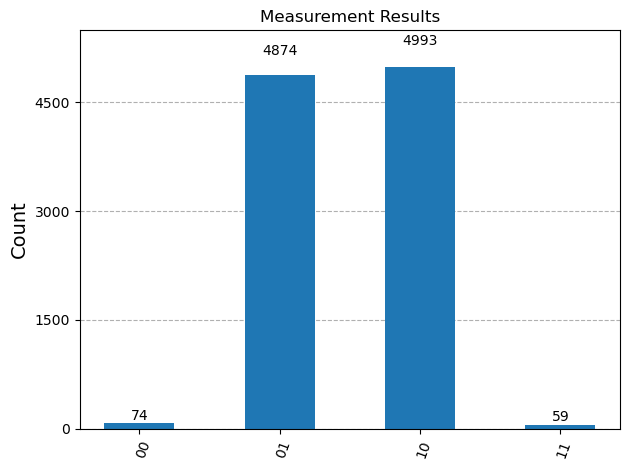

In [3]:
backend = AerSimulator()
counts_list = qet.get_counts(backend = backend, shots=10000)
display(plot_histogram(counts_list, title="Measurement Results"))

In [4]:
qet.calculate_EA()

Alice's exact local energy: 1.3416407864998738
Alice's measured local energy, E_A: 1.327240786499874 ± 0.02999965439800932


(1.3416407864998738, 1.327240786499874, 0.02999965439800932)

In [5]:
qet.calculate_EV()

The interacting energy, E_V: -0.9044737080010098 ± 0.11999930639799547


(-0.9044737080010098, 0.11999930639799547)

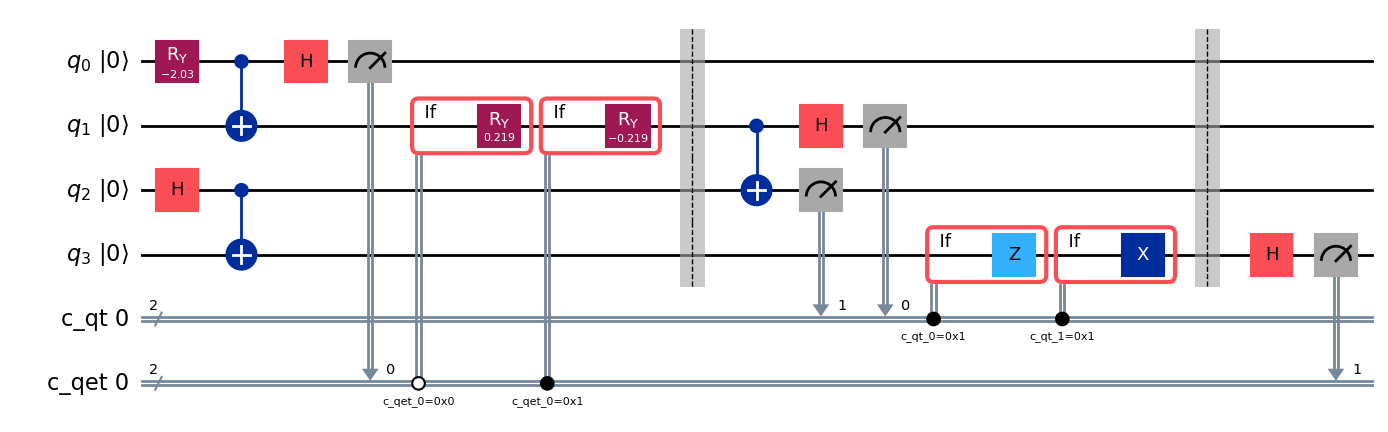

In [6]:
lr_qet = LongRangeQETCircuit(3, 6, v_measure=True)
lr_qet.build_circuit()
lr_qet.draw_circuit()

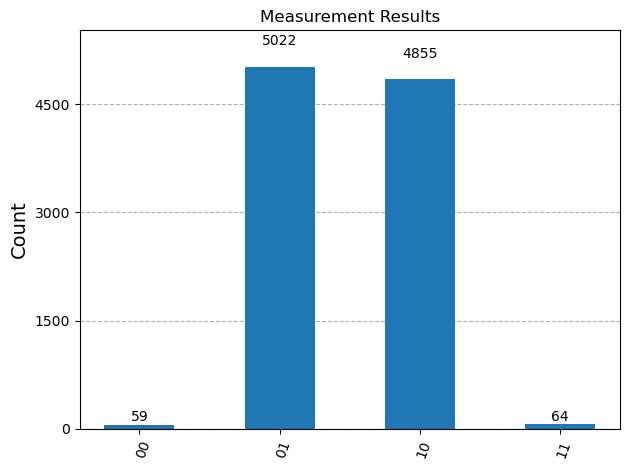

In [7]:
backend = AerSimulator()
lr_counts_list = lr_qet.get_counts(backend = backend, shots=10000)
display(plot_histogram(lr_counts_list, title="Measurement Results"))

In [8]:
lr_qet.calculate_EA()

Alice's exact local energy: 1.3416407864998738
Alice's measured local energy, E_A: 1.3782407864998738 ± 0.029997767316918774


(1.3416407864998738, 1.3782407864998738, 0.029997767316918774)

In [9]:
lr_qet.calculate_EV()

The interacting energy, E_V: -0.8732737080010088 ± 0.11999513990158102


(-0.8732737080010088, 0.11999513990158102)

In [10]:
qet = MinimalQETCircuit(3, 6, v_measure=True)
qet.build_circuit()

In [11]:
from qiskit_ibm_runtime.fake_provider import FakeFez

service = QiskitRuntimeService()
backend = FakeFez()

backend.refresh(service)

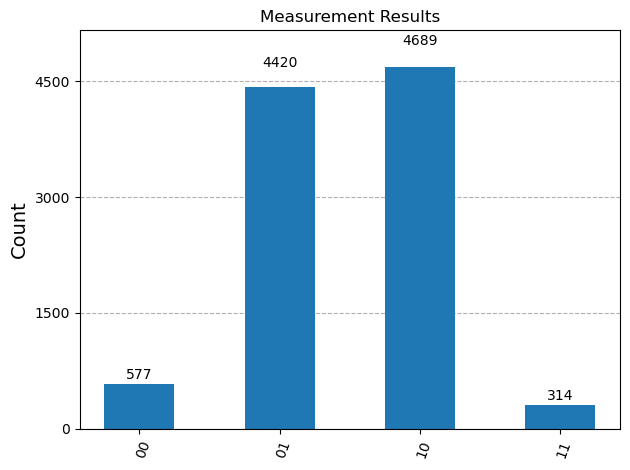

In [12]:
counts_list = qet.get_counts(backend = backend, shots=10000)
display(plot_histogram(counts_list, title="Measurement Results"))

In [13]:
qet.calculate_EA()
qet.calculate_EV()

Alice's exact local energy: 1.3416407864998738
Alice's measured local energy, E_A: 1.489840786499874 ± 0.029963372240120106
The interacting energy, E_V: 0.8763262919989908 ± 0.1199801239539283


(0.8763262919989908, 0.1199801239539283)

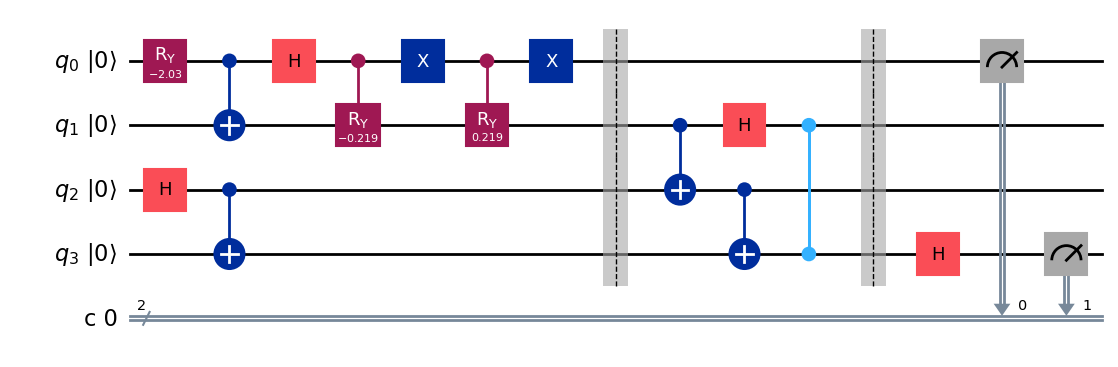

In [14]:
qet = LongRangeQETCircuitStatic(3, 6, v_measure=True, dynamical_decoupling=True, pauli_twirl=True)
qet.build_circuit()
qet.draw_circuit()

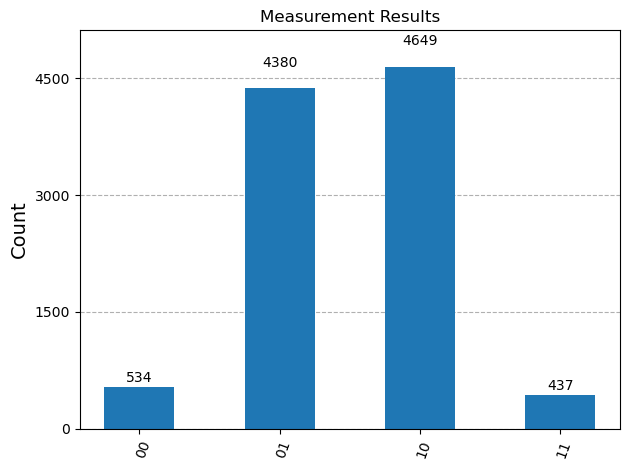

In [15]:
backend = service.backend("ibm_fez")
counts_list = qet.get_counts(backend = backend, shots=10000)
display(plot_histogram(counts_list, title="Measurement Results"))

In [16]:
qet.calculate_EA()
qet.calculate_EV()

Alice's exact local energy: 1.3416407864998738
Alice's measured local energy, E_A: 1.422640786499874 ± 0.029989063006369502
The interacting energy, E_V: 0.7563262919989904 ± 0.11998857305593727


(0.7563262919989904, 0.11998857305593727)